<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/3%EC%9E%A5%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%EA%B3%BC%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

     |████████████████████████████████| 542kB 3.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=2db9b5103e30de0edc2c64c5605513d680b7edccca0dcd9bdd855243f3a16bf1
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

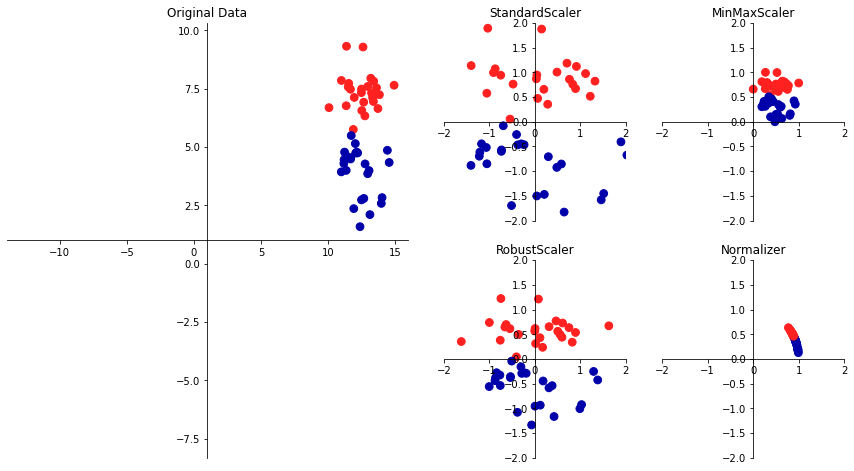

In [3]:
mglearn.plots.plot_scaling()
#original data와 그 외 데이터셋 스케일 조정/전처리하는 방법
#standardscaler 
#minmaxscaler
#robustscaler
#normalizer

# 데이터를 기준이 되는 범위로 변환하는 네 가지 방법

* StandardScaler : 각 특성의 평균 0, 분산 1로 변경해 모든 특성이 같은 크기를 가지게 한다. / 특성의 최솟값과 최댓값 크기를 제한하지 않는다
* RobustScaler : 특성들이 같은 스케일을 갖게 된다 / 평균 분산이 아니라 중간 값과 사분위 값을 사용한다 => 전체 데이터와 아주 동떨어진 데이터 포인트를 영향 받지 않는다
* MinMaxScaler : 모든 특성이 정확하게 (0,1) 사이에 위치하도록 데이터를 변경한다(2차원의 경우, 모든 데이터가 x,y축에서 0,1 사이 사각영역 안에 담긴다)
* Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 특성 벡터의 길이는 상관없음-데이터 방향 혹은 각도 중요할 때 사용

스케일을 조정하는 전처리 메서드들은 지도 학습 알고리즘을 적용하기 전에 적용한다.


In [4]:
from sklearn.datasets import load_breast_cancer #cancer 데이터셋 적재
from sklearn.model_selection import train_test_split #훈련세트와 테스트 세트로 나누기
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
#train_test_split 함수를 어느 데이터에서나 사용하는가?
#이 함수는 어떻게 알고 알아서 특성 변수와 종속 변수를 나눌 수 있는가?

In [5]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
print(y_train.shape)
print(y_test.shape)

(426,)
(143,)


In [7]:
from sklearn.preprocessing import MinMaxScaler #전처리가 구현된 파이썬 클래스 임포트
scaler = MinMaxScaler() #객체 생성

In [8]:
scaler.fit(X_train) #fit 메서드에 훈련 데이터를 적용한다.
#훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산한다
#지도학습과 달리 훈련 데이터(X_train)만 넘기면 된다

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
X_train_scaled = scaler.transform(X_train) #fit으로 학습한 변환을 실제로 훈련 데이터의 스케일을 조정하기 위해서는 .transform 이라 해야함
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n",X_train.max(axis=0),"\n")

print("스케일 조정 후 특성별 최소값:\n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n",X_train_scaled.max(axis=0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01] 

스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [10]:
#특성 값이 이동되거나 크기가 조정되었을 뿐, 배열 크기는 동일
#svm에 적용하려면 테스트 세트도 변환해야한다
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.min(axis=1))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [ 0.07965663  0.03258884  0.02029892  0.00664013  0.02954549  0.05106892
  0.03339925  0.06943529  0.03066504  0.03529711  0.01258503  0.04519628
  0.03976107  0.00166806  0.03849099  0.0354798   0.02280173  0.03878983
 -0.00137796  0.03361898  0.01953313  0.02521115  0.03151472  0.04075099
  0.05311563  0.01790817  0.02379165  0.07085859  0.06398988  0.04372665
  0.03083531  0.00746734  0.08050505  0.02250289  0.01381776  0.01443687
  0.0409596   0.02830808  0.01899148  0.02065379  0.02395975  0.02502437
  0.05890571  0.01467693  0.02657462  0.098353    0.00920437  0.01790817
  0.01120048  0.0860

In [11]:
#181쪽 : transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눈다

Quantile Transformer & PowerTransformer

Quantile Transformer : 기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다.

* RobustScaler와 비슷하게 이상치에 민감하지 않으며,

* 전체 데이터를 (0,1) 사이로 압축시킨다

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

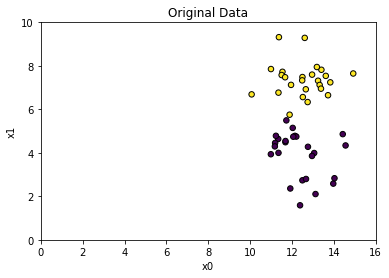

In [13]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1) #가우시안 정규분포를 이용해 데이터 생성
X += 3

plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylabel('x1')
plt.ylim(0,10)
plt.title("Original Data")
plt.show()

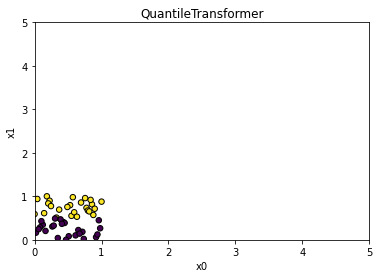

In [14]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

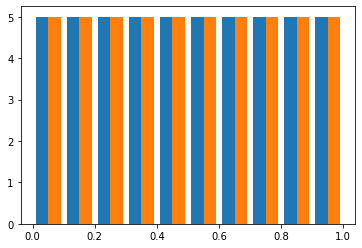

In [15]:
plt.hist(X_trans)
plt.show()

In [16]:
print(scaler.quantiles_.shape)
#여기 50나오는데요?

(50, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


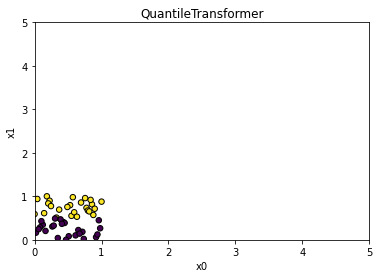

In [17]:
scaler = QuantileTransformer(n_quantiles=1000)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

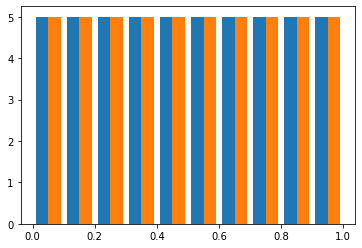

In [18]:
plt.hist(X_trans)
plt.show()

In [19]:
print(scaler.quantiles_.shape)

(50, 2)


## 복귀 (다른 사람도 나랑 똑같아)

In [20]:
#하나의 특성과 다섯 개의 샘플로 이루어진 데이터셋
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0],[0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [21]:
print(x)

[[ 0]
 [ 5]
 [ 8]
 [ 9]
 [10]]


In [22]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


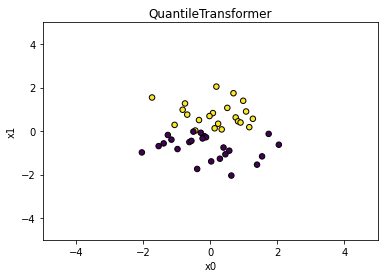

In [23]:
scaler = QuantileTransformer(output_distribution= 'normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s = 30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

* PowerTransformer : 데이터의 특성별로 정규분포 형태에 가깝게 변환
* QuntileTransformer / StandardScaler / PowerTrandsformer 알고리즘이 예제 데이터셋을 정규본포로 변환하는 차이 확인

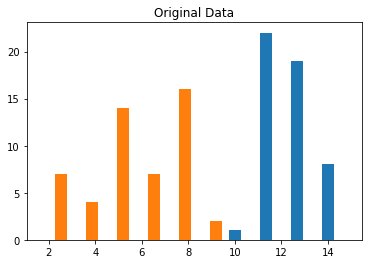

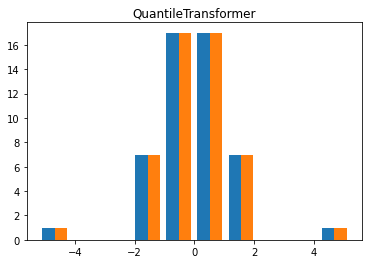

In [24]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

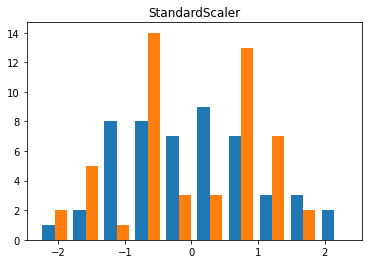

In [25]:
X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

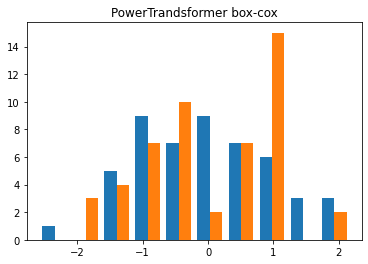

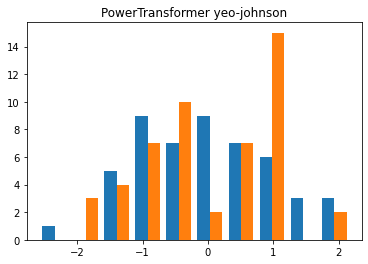

In [26]:
X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTrandsformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

In [27]:
#왜 정규분포에 가깝게 변환하는가? 정규성을 만족한다란

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기
지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요하다
* 테스트 세트의 최솟값과 범위를 사용했을 때 어떤 일이 일어나는지 아래에서 살펴보자 (위의 중요한 점과 반대)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text

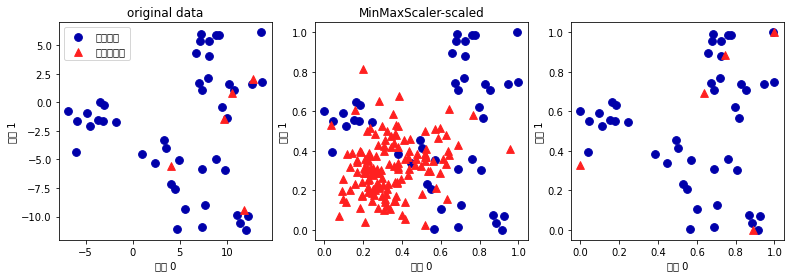

In [28]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)

#훈련 세트와 테스트 세트의 산점도 그리기
fig, axes = plt.subplots(1,3,figsize = (13,4))
axes[0].scatter(X_train[:,0], X_train[:,1],
                c=mglearn.cm2.colors[0], label = "훈련세트", s=60) #s = 60 (마커 크기)
axes[0].scatter(X_test[:,0], X_test[:,1], marker = "^",
                c=mglearn.cm2.colors[1], label = "테스트세트",s=60)
axes[0].legend(loc = "upper left")
axes[0].set_title("original data")

#MinMaxScaler 사용해서 스케일 조정하기
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c=mglearn.cm2.colors[0], label = "훈련세트", s= 60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker = "^",
                c=mglearn.cm2.colors[1], label = "테스트세트",s=60)
axes[1].set_title("MinMaxScaler-scaled")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
#잘못 조정된 데이터 산점도
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1],
                c=mglearn.cm2.colors[0], label = 'training set', s = 60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1],
                marker = "^", c = mglearn.cm2.colors[1], label = "test set", s =60)
for ax in axes:
  ax.set_xlabel('특성 0')
  ax.set_ylabel('특성 1')

## 3.3.5 지도학습에서 데이터 전처리 효과

In [29]:
from sklearn.svm import SVC #svc 학습
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
#원본 데이터에 바로 svc 학습
svm=SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.94


In [30]:
#minmaxscaler() 적용 후 svc
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X 값을 (0,1)로 스케일 조정

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


In [31]:
#평균0 분산1 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("SVM test accuracy : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy : 0.96


* scaler.fit 을 X_train에만 하는 이유
* .fit으로는 볼 수 있는게 없는가?
* .score 값은 fit과 같은 값인가?

# 3.4 차원 축소, 특성 추출, 매니폴드 학습

비지도 학습을 사용해 데이터를 변환하는 이유 : 시각화, 데이터 압축, 추가적인 처리(지도학습에서 활용을 위해 사전 작업)
* 주성분 분석 (PCA)
* 비음수 행렬 분해 (NMF : non negative matrix factorization) : 특성 추출에 사용
* t- SNE : 2차원 산점도 이용해 시각화 알고리즘

# 3.4.1 주성분 분석
특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
데이터를 설명하는데 얼마나 중요하냐에 따라 새로운 특성 중 일부만 선택
2치원 데이터셋 PCA 효과

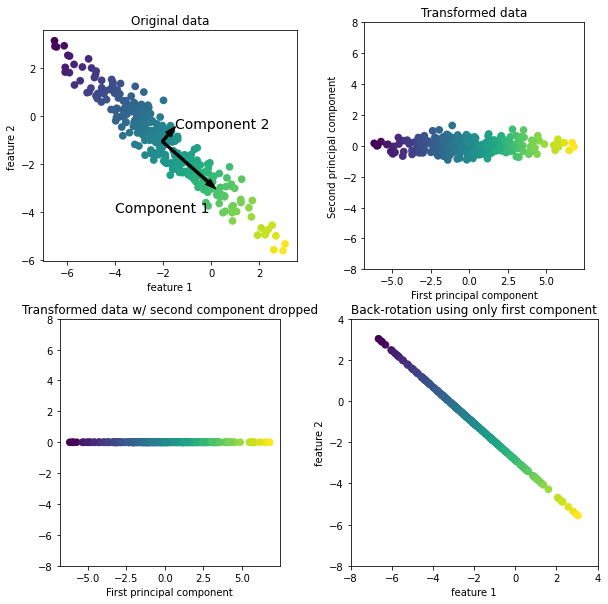

In [32]:
mglearn.plots.plot_pca_illustration()
#component1  : 분산이 가장 큰 방향 = 데이터 정보를 가장 많이 담고 있는 방향 = 특성들의 상관관계가 가장 큰 방향
#방향이라고 꼭 표현하는 이유, 방향이 물리적인 공간에서 방향(어느 쪽으로 가야하는지)와 같은 의미야?
#방향이 feature는 아니지.
#상관관계가 크지 않다면? 상관관계는 절댓값 1일 때 가장 크잖아. 그렇다면 0에 가까운 형태에면 상관성이 가장 적은 거겠지?
#기울기 0 수평선 그래프?

## 고차원에서는 무한히 많은 직각 방향이 있을 수 있다


# pca를 적용해 유방암 데이터셋 시각화하기
* y : 
* x : 
* 데이터 분석을 위한 주제는 무엇이었을까?

*  iris 데이터는 두 개씩 짝지은 특성들의 관계를 산점도 행렬로 그릴 수 있었으나! 유방암 데이터셋은 특성을 30개나 가져 산점도 행렬을 그릴려면 너무 많다!(불가능)


In [33]:
#cancer.data
cancer.target
#cancer.feature_names

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

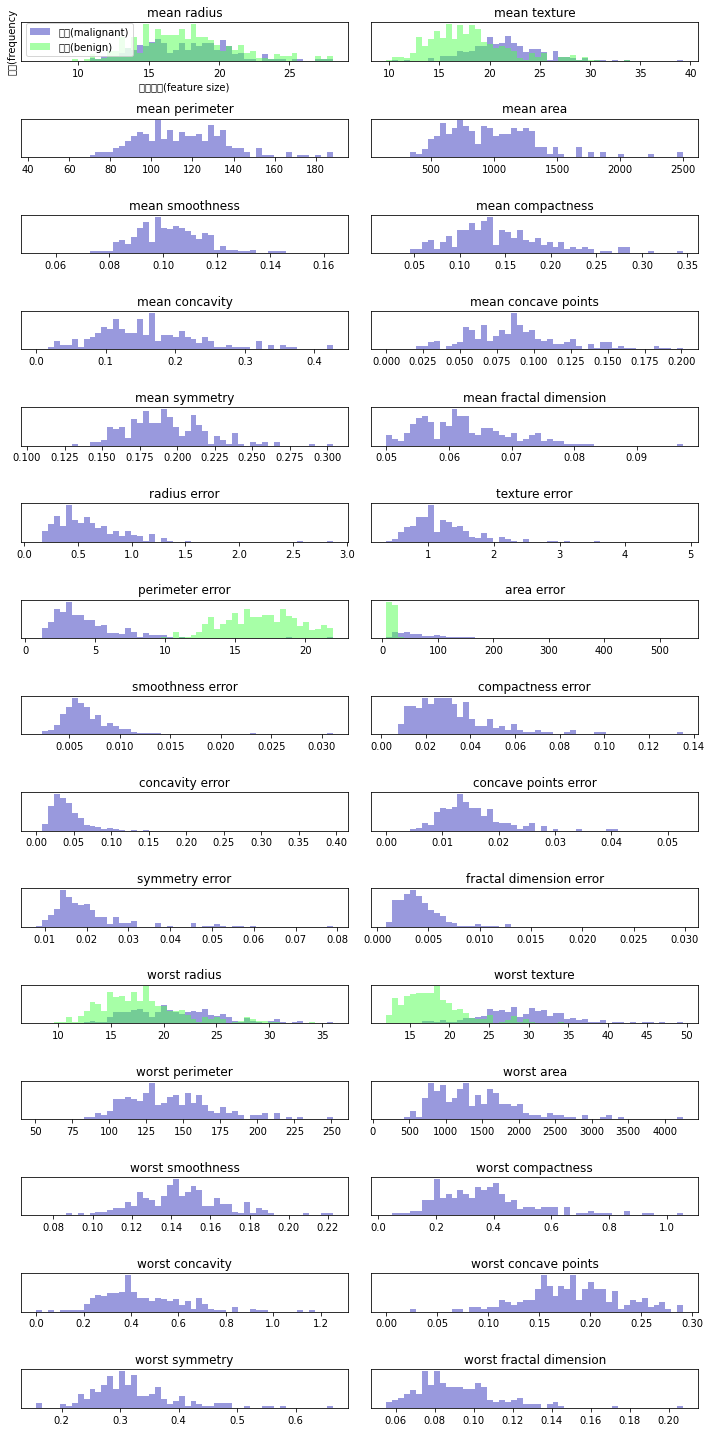

In [34]:
fig, axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0] #cancer.data != cancer.target (조건에 맞는(.target == 0) feature값
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins = 50) #[:, i] : 모든 행과 0번부터 30번까지 열(feature)
  ax[i].hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha = .4) #bin : 히스토그램의 특정 간격을 지칭
  ax[i].hist(benign[:,1], bins = bins, color = mglearn.cm3(2), alpha = .5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("특성크기(feature size)")
ax[0].set_ylabel("빈도(frequency")
ax[0].legend(['악성(malignant)','양성(benign)'], loc = 'best')
fig.tight_layout()

#특성[i]들이 클래스별로(양성/악성)별로 어떻게 분포되었는지 확인
#어떤 특성이 양성/악성 샘플을 구분하는데 더 좋은지 가늠해볼 수 있다
#악성과 양성을 구분할 건데, smoothness error는 악성/양성이 겹쳐서 둘을 구분하는데 좋지 않음
#악성과 양성을 구분하기 위해서는 두 클래스 간에 데이터가 겹치지 않는게 좋음. 그렇다면 히스토그램 간에 겹치지 않는 wort concave points를 택하는게 좋다
#특성 간 상호작용이나 상호작용이 클래스와 어떻게 연관이 있는지 구체적으로 알려줄 수 없음 -> pca를 사용해 상호작용을 찾아낼 수 있다

In [35]:
#pca를 사용해 상호작용을 찾아낸다
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(cancer.data)
#standardscaler 를 활용해 각 특성의 분산이 1이 되도록 데이터 스케일 조정하기

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #처음 두 개의 주성분만 유지. 여기때문에 X_pca.shape가 줄어든듯?
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : ",str(X_scaled.shape))
print("축소된 데이터 형태 :", str(X_pca.shape))


원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 : (569, 2)


In [37]:
#데이터프레임으로 못 보니깐 어려워
#X_pca가 가지는 의미 (X_scaled?와 뭐가 다른가?)

Text(0, 0.5, 'the second pca(두번째 주성분)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

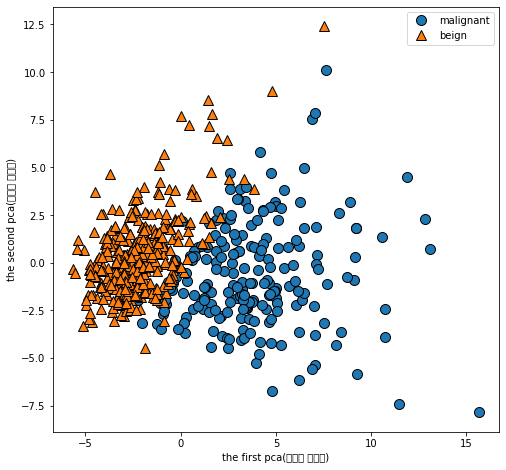

In [38]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],cancer.target)
plt.legend(['malignant','beign'], loc = 'best')
plt.gca().set_aspect("equal")
plt.xlabel('the first pca(첫번째 주성분)')
plt.ylabel('the second pca(두번째 주성분)')
#첫번째 주성분은 feature 1을 말하나? 그건 아닐걸.... 모든 feature를 다 포함한다고 들었는데
#첫번째 주성분과 두번째 주성분의 차이는 무엇인가? 고유값?? 고유벡터?

In [39]:
print("PCA 주성분 형태 :", pca.components_.shape)

PCA 주성분 형태 : (2, 30)


In [40]:
print("PCA 주성분 : ",pca.components_)
#[0.21162 ~ 0.14045931] : 첫번째 주성분 - 중요도에 따라 정렬 (중요도가 크다고 해서 값이 무조건 큰 건 아닌가보다?!)
#열은 원본 데이터의 특성(feature)

PCA 주성분 :  [[ 0.21162071  0.10781133  0.22110213  0.21004456  0.14779604  0.2526455
   0.26320412  0.25932222  0.13956482  0.07406012  0.19430082  0.01874775
   0.20311889  0.18493359  0.01853146  0.18508148  0.15117641  0.19371271
   0.04498731  0.10859643  0.21982037  0.1060055   0.22928582  0.21282614
   0.13089673  0.22182652  0.24353553  0.25132406  0.12289296  0.14045931]
 [-0.2412808  -0.06939245 -0.22381814 -0.23405004  0.18039062  0.14403632
   0.04700402 -0.04775839  0.17812521  0.37267764 -0.10657391  0.09288067
  -0.09290845 -0.14723354  0.22231427  0.23713681  0.18127022  0.12819379
   0.184665    0.27794818 -0.22737131 -0.05486731 -0.20863032 -0.2220934
   0.16177527  0.13314486  0.08644784 -0.02360344  0.12570439  0.26796962]]


Text(0, 0.5, 'pca')

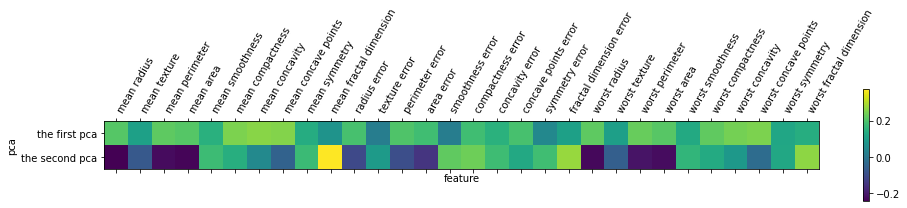

In [41]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['the first pca','the second pca'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation = 60, ha = 'left') #이게 뭘까
plt.xlabel('feature')
plt.ylabel('pca')
#해석하는 방법 : 첫번째 주성분은 모든 특성의 부호가 같다 (왜? 히트맵이 초록색, 연두색으로 0 이상의 값을 말함)
#모든 특성 사이에 공통의 상호관계가 있다.

#두번째 주성분은 부호가 섞여있음(초록색에서 노란색은 양수, 초록색에서 보라색은 음수)

#두 주성분은 모두 30개의 특성이 있다. 모든 특성이 섞여 있기 때문에 축이 가지는 의미를 설명하기 쉽지 않다
#그러면 모든 특성을 가지지 않으면 어떤데? 

# 고유얼굴 특성 추출
* pca는 특성 추출에도 사용된다.

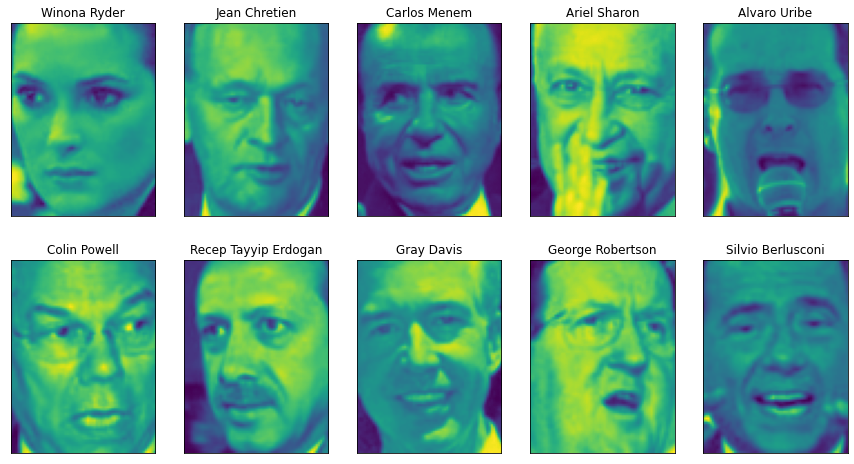

In [42]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize= 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8),
                         subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [43]:
print("people.images.shape :", people.images.shape)
print("클래스 개수 :",len(people.target_names))

people.images.shape : (3023, 87, 65)
클래스 개수 : 62


In [44]:
#각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
#타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end = " ")
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [45]:
#데이터 편중을 없애기 위해 사람마다 50개 이미지만 선택
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [46]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근점 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근점 이웃의 테스트 세트 점수 : 0.23


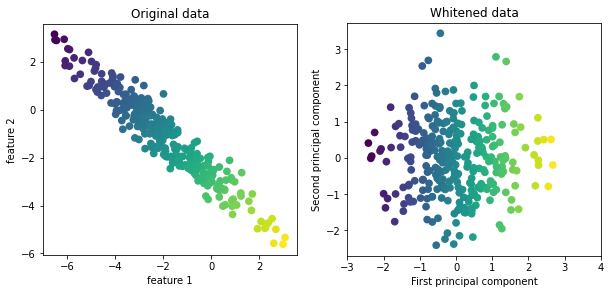

In [47]:
mglearn.plots.plot_pca_whitening()

In [48]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : ", X_train_pca.shape)

X_train_pca.shape :  (1547, 100)


In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도 : 0.31


In [50]:
print("pca.components_.shape", pca.components_.shape)

pca.components_.shape (100, 5655)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text

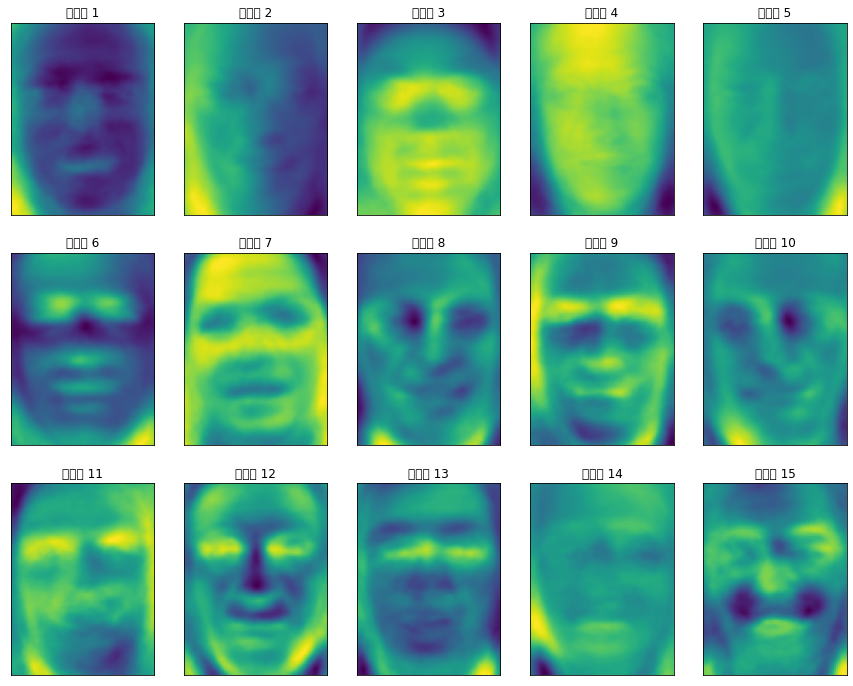

In [51]:
fig, axes = plt.subplots(3,5, figsize = (15,12),
                         subplot_kw = {'xticks' : (), 'yticks' : ()})
for i , (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap = 'viridis')
  ax.set_title("주성분 {}".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 6.8s, 0.1min


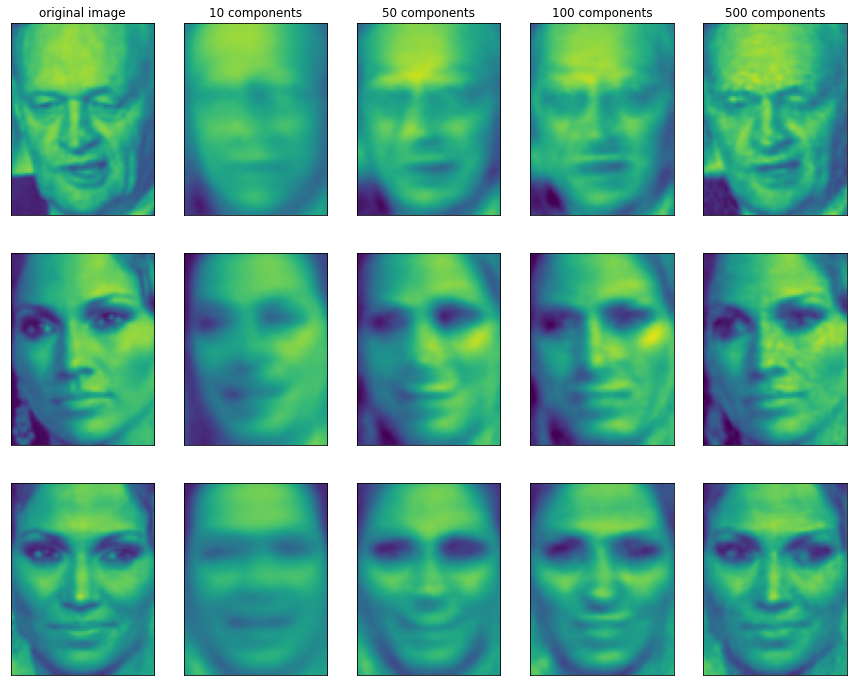

In [52]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '(두 번째 주성분)the 2nd pca')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

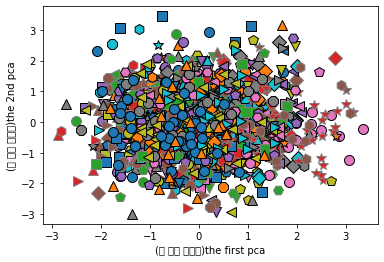

In [53]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel('(첫 번째 주성분)the first pca')
plt.ylabel('(두 번째 주성분)the 2nd pca')

# 비음수 행렬 분해(NMF) 

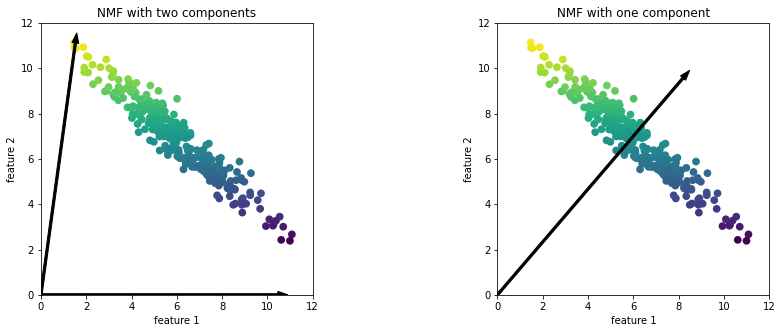

In [54]:
mglearn.plots.plot_nmf_illustration()

In [ ]:
mglearn.plots.plot_nmf_faces(X_train,X_test, image_shape)
#mglearn은 특별히 이 책을 위해 만들어 준 것이라면, 평소에는 쓰이지 않는다.
#그래도 다른 함수들이나 개념은 알아두면 되겠지

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)


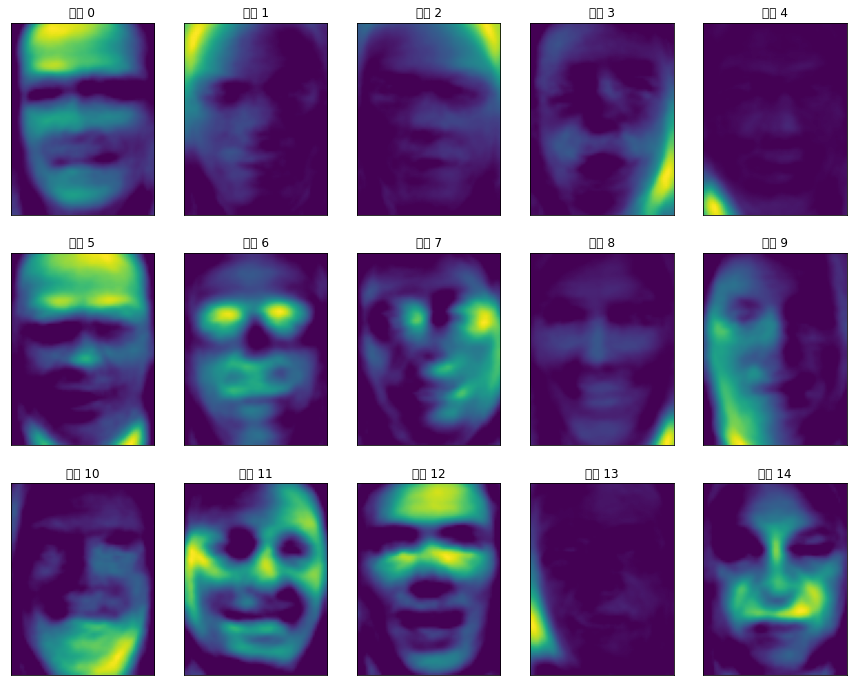

In [59]:
#NMF는 데이터에 있는 유용한 패턴을 찾는데 활용
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state = 0, max_iter = 1000, tol = 1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5, figsize = (15,12),
                         subplot_kw = {'xticks' : (), 'yticks': () })
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  #enumerate : 순서가 있는 자료를 입력받아, 인덱스값과 함께 내보냄
  ##zip(nmf.components_, axes_ravel()) 두 값의 짝을 맞춰서 출력할 수 있게 해줌
  ax.imshow(component.reshape(image_shape))
  ax.set_title('성분 {}'.format(i))


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0e8dacadd0> (for post_execute):


TypeError: ignored

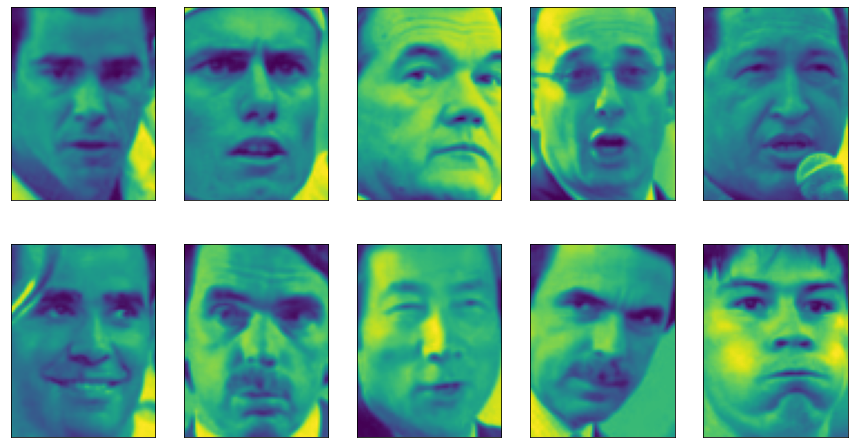

TypeError: ignored

In [62]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5, figsize = (15,8),
                         subplot_kw = {'xticks':(),'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))


compn = 7 
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5, figsize = (15,8),
                         subplot_kw = {'xticks':{}, 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text

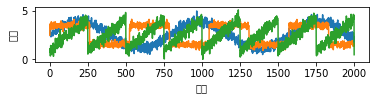

In [63]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6,1))
plt.plot(S,'-')
plt.xlabel('시간')
plt.ylabel('신호')

In [64]:
A = np.random.RandomState(0).uniform(size = (100,3))
X = np.dot(S,A.T)
print('측정 데이터 형태:', X.shape)

측정 데이터 형태: (2000, 100)


In [65]:
nmf = NMF(n_components = 3, random_state=42, max_iter = 1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태 :',S_.shape)

복원한 신호 데이터 형태 : (2000, 3)


In [66]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_

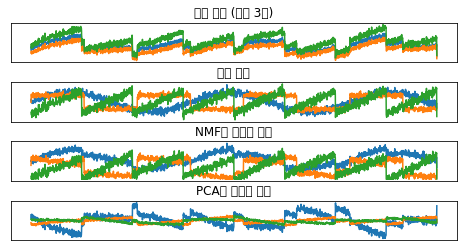

In [68]:
models = [X,S,S_,H]
names = ['측정 신호 (처음 3개)',
         '원본 신호',
         'NMF로 복원한 신호',
         'PCA로 복원한 신호']

fig, axes = plt.subplots(4, figsize = (8,4), gridspec_kw = {'hspace':.5},
                         subplot_kw = {'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes) :
  ax.set_title(name)
  ax.plot(model[:,:3], '-')
  #3열까지의 모든 행을 말하니?
  #0,1,2열까지만 출력해야하는데?

In [ ]:
#여기는 정말 무슨 말인지 일도 모르겠어

* 3.4.3 t-SNE 를 이용한 매니폴드 학습

# 3.5 군집

* 3.5.1 K-평균 군집

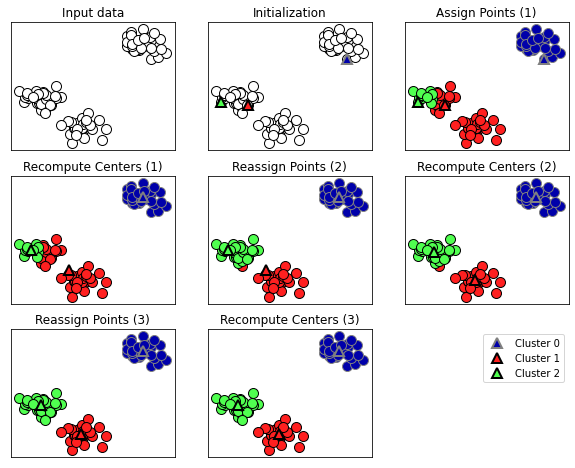

In [70]:
#데이터 포인트를 가장 가까운 클러스터 중심에 할당한다
#클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정한다

mglearn.plots.plot_kmeans_algorithm()

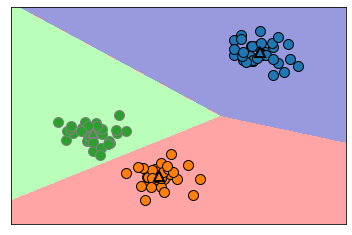

In [71]:
mglearn.plots.plot_kmeans_boundaries()

In [73]:
#인위적인 데이터셋
from sklearn.datasets import make_blobs #클러스터링용 가상 데이터셋

from sklearn.cluster import KMeans #k-평균 알고리즘

X, y = make_blobs(random_state=1)#2차원 데이터셋 만들기

kmeans = KMeans(n_clusters= 3)#군집모델 : 3개 클러스터
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
print('클러스터 레이블 : \n {}'.format(kmeans.labels_))
#KMeans(n_clusters = 3) 라고 3개 클러스터를 지정했기 때문에 클러스터 레이블로 0,1,2 값을 가지는 것이다.
#그렇다면, 클러스터링을 하고 싶을 때 다른 곳에서도 이렇게 하면 되는건가?

클러스터 레이블 : 
 [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


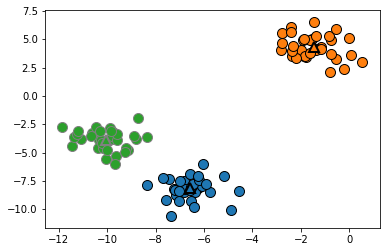

In [77]:
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
                        #feature1, feature2
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
    #각 군집마다 feature1의 중심, 각 군집마다 feature2의 중심
    markers="^", markeredgewidth=2
    #markeredgewidth 는 변의 두께를 말하지
)

[1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1]
[1 3 0 0 2 2 2 3 4 1 3 0 2 4 2 2 2 1 0 0 2 0 2 1 3 2 2 1 1 2 4 1 2 1 3 2 3
 0 3 2 2 3 1 0 3 2 4 1 4 1 3 2 2 2 4 2 0 0 4 1 0 2 2 3 0 2 4 2 1 3 0 3 2 4
 4 3 2 2 1 0 4 0 0 2 1 1 4 1 0 4 2 1 4 0 3 2 2 4 2 1]


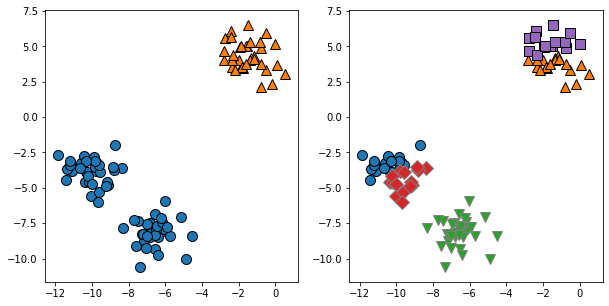

In [83]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

#클러스터가 2개일 때
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
print(assignments) #0,1
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax = axes[0])

#클러스터가 5개일 때
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
assignments = kmeans.labels_
print(assignments)
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax = axes[1])